In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [6]:
df = pd.read_csv("Data/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [15]:
#pip install --upgrade pip

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.5036 - accuracy: 0.7958 - val_loss: 0.4928 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7958 - val_loss: 0.4819 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7958 - val_loss: 0.4715 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7958 - val_loss: 0.4628 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7958 - val_loss: 0.4554 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.7958 - val_loss: 0.4494 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.7958 - val_loss: 0.4446 - val_accuracy: 0.7969

Epoch 58/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8302 - val_loss: 0.3904 - val_accuracy: 0.8313
Epoch 59/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8295 - val_loss: 0.3900 - val_accuracy: 0.8319
Epoch 60/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8306 - val_loss: 0.3897 - val_accuracy: 0.8306
Epoch 61/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8306 - val_loss: 0.3894 - val_accuracy: 0.8306
Epoch 62/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8309 - val_loss: 0.3891 - val_accuracy: 0.8313
Epoch 63/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8302 - val_loss: 0.3887 - val_accuracy: 0.8319
Epoch 64/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8311 - val_loss: 0.3884 - val_accuracy:

In [31]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 724us/step


In [32]:
y_pred

array([[0.58386797],
       [0.58386797],
       [0.58386797],
       ...,
       [0.58386797],
       [0.58386797],
       [0.58386797]], dtype=float32)

In [33]:
y_pred = y_pred.argmax(axis=-1)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

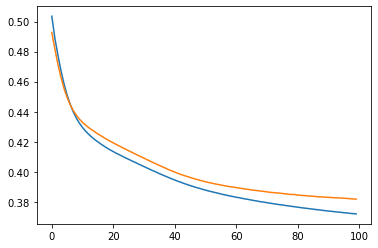

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

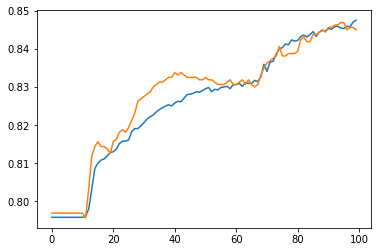

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [39]:
model2 = Sequential()

model2.add(Dense(11,activation='sigmoid',input_dim=11))
model2.add(Dense(11,activation='sigmoid'))
model2.add(Dense(1,activation='sigmoid'))

In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
history = model2.fit(X_train,y_train,batch_size=50,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
128/128 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7958 - val_loss: 0.5006 - val_accuracy: 0.7969
Epoch 2/10
128/128 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7958 - val_loss: 0.5008 - val_accuracy: 0.7969
Epoch 3/10
128/128 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7958 - val_loss: 0.5006 - val_accuracy: 0.7969
Epoch 4/10
128/128 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7958 - val_loss: 0.5005 - val_accuracy: 0.7969
Epoch 5/10
128/128 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7958 - val_loss: 0.5005 - val_accuracy: 0.7969
Epoch 6/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7958 - val_loss: 0.5005 - val_accuracy: 0.7969
Epoch 7/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7958 - val_loss: 0.5005 - val_accuracy: 0.7969
Epoch 

In [52]:
y_pred = model2.predict(X_test)

63/63 [==============================] - 0s 929us/step


In [53]:
y_pred = y_pred.argmax(axis=-1)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

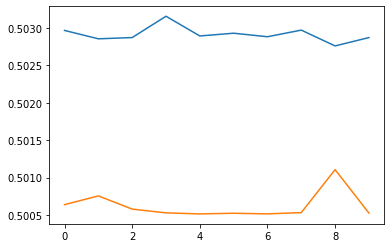

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

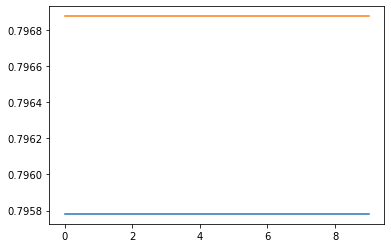

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])